1. 데이터 준비 및 표준화 완료.
   원본 데이터 차원: 17차원
--------------------------------------------------
2. PCA 모델 학습 완료. 17차원 -> 2차원 축소
   축소된 데이터 형태: (8950, 2)
--------------------------------------------------
3-1. 주성분별 분산 설명력 (Explained Variance Ratio):
   PC 1: 0.2729
   PC 2: 0.2030
   누적 분산 설명력 (PC 1 ~ 2): 0.4759

3-2. 로딩 벡터 (주성분을 구성하는 원본 변수의 가중치):
                             PC1       PC2
BALANCE                 0.101078  0.403956
BALANCE_FREQUENCY       0.120043  0.130538
PURCHASES               0.411642  0.041037
ONEOFF_PURCHASES        0.346407  0.062871
INSTALLMENTS_PURCHASES  0.336814 -0.018532
--------------------------------------------------


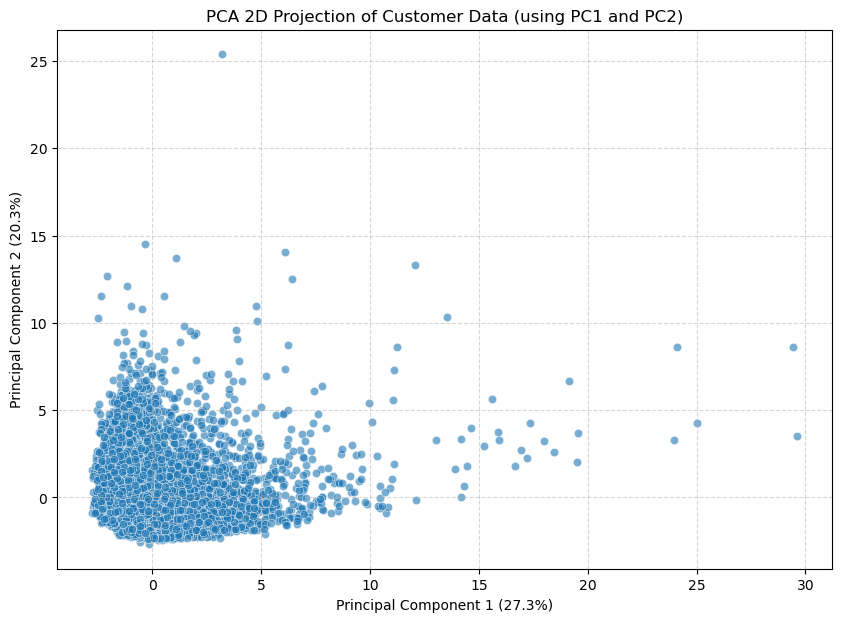

4. PCA 기반 2차원 시각화 완료 (PC1 vs PC2).


In [3]:
# ------------------------------
# 차원 축소: 주성분 분석 (PCA) 파이썬 예제 코드 (N_COMPONENTS 동적 처리)
# ------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------
## 1. 라이브러리 및 데이터 준비/전처리
# ----------------------------------------------------

# 데이터 로드
file_path = "CC GENERAL.csv"
df = pd.read_csv(file_path)

# CUST_ID 컬럼 제외
df_model = df.drop('CUST_ID', axis=1, errors='ignore')

# 결측치 처리 (PCA는 결측치를 허용하지 않음, 평균으로 대체)
df_model.fillna(df_model.mean(), inplace=True)

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

print("1. 데이터 준비 및 표준화 완료.")
print(f"   원본 데이터 차원: {df_model.shape[1]}차원")
print("-" * 50)


# ----------------------------------------------------
## 2. PCA 모델 학습 및 차원 축소
# ----------------------------------------------------

# [!] 변경 가능: 주성분의 개수 설정
N_COMPONENTS = 2  # 예시로 3개로 설정

pca = PCA(n_components=N_COMPONENTS)

# 학습 및 데이터 변환 (축소)
X_pca = pca.fit_transform(X_scaled)

# 컬럼명 리스트를 N_COMPONENTS 값에 따라 동적으로 생성
PCA_COLS = [f'PC{i+1}' for i in range(N_COMPONENTS)]

print(f"2. PCA 모델 학습 완료. {df_model.shape[1]}차원 -> {N_COMPONENTS}차원 축소")
print(f"   축소된 데이터 형태: {X_pca.shape}")
print("-" * 50)


# ----------------------------------------------------
## 3. PCA 결과 분석 및 해석 (N_COMPONENTS 동적 처리)
# ----------------------------------------------------

# 3-1. 분산 설명력 (Explained Variance Ratio) 확인
explained_variance = pca.explained_variance_ratio_

print("3-1. 주성분별 분산 설명력 (Explained Variance Ratio):")
for i, ratio in enumerate(explained_variance):
    print(f"   PC {i+1}: {ratio:.4f}")

cumulative_variance = explained_variance.sum()
print(f"   누적 분산 설명력 (PC 1 ~ {N_COMPONENTS}): {cumulative_variance:.4f}")

# 3-2. 로딩 벡터(Loading Vector) 확인
#  [!]  N_COMPONENTS 값에 맞게 컬럼명 리스트(PCA_COLS) 사용
loading_vectors = pd.DataFrame(pca.components_.T,
                               columns=PCA_COLS,
                               index=df_model.columns)

print("\n3-2. 로딩 벡터 (주성분을 구성하는 원본 변수의 가중치):")
#  [!]  N_COMPONENTS 값에 따라 모든 PC의 로딩 벡터를 출력
print(loading_vectors.head(5))
print("-" * 50)


# ----------------------------------------------------
## 4. 축소된 데이터 시각화 (N_COMPONENTS 동적 처리)
# ----------------------------------------------------

#  [!]  N_COMPONENTS 값에 맞게 데이터프레임 컬럼명 설정
df_pca = pd.DataFrame(data=X_pca, columns=PCA_COLS)

# 시각화는 2차원 평면에만 가능하므로, N_COMPONENTS가 2 이상일 때만 실행합니다.
if N_COMPONENTS >= 2:
    plt.figure(figsize=(10, 7))
    
    # 2차원 평면에 첫 번째 주성분(PC1)과 두 번째 주성분(PC2)을 사용하여 시각화
    #  [!]  PC1과 PC2의 인덱스는 0과 1
    sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.6)

    plt.title('PCA 2D Projection of Customer Data (using PC1 and PC2)')
    plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
    plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    print("4. PCA 기반 2차원 시각화 완료 (PC1 vs PC2).")
else:
    print("4. 주성분 개수가 2개 미만이므로 2차원 시각화를 건너뜁니다.")